# Top overlapping annotations by weighted sum for ecoli cohort

In [1]:
import pandas as pd


pd.set_option("display.max_columns", None) # show all cols
pd.set_option('display.max_colwidth', None) # show full width of showing cols
pd.set_option("display.expand_frame_repr", False) # print cols side by side as it's supposed to be

## Read token information from bed files

In [2]:
import os
import pandas as pd
from pathlib import Path


bedDir = Path(os.environ['GENOMICS_DATA_BASE'], 'genome_nlp_tokens', 'bed_files', 'SAUR')

bedDfList = []
for bedFile in os.listdir(bedDir):
    tubeid = bedFile.split('.')[0].split('_')[0]
    tokensDf = pd.read_csv(Path(bedDir, bedFile), sep='\t', names=['contig_id', 'start_position', 'end_position', 'tokens', 'score'])
    tokensDf['tube_id'] = tubeid
    bedDfList.append(tokensDf)

bedDf = pd.concat(bedDfList, ignore_index=True)
bedDf

,contig_id,start_position,end_position,tokens,score,tube_id
0,1,0,6,TTTTCTT,0.000064,ALF22G140
1,1,7,9,ACC,-0.000395,ALF22G140
2,1,10,13,GACA,0.001573,ALF22G140
3,1,14,18,AGAAT,-0.000986,ALF22G140
4,1,19,25,TAATTAT,0.000795,ALF22G140
...,...,...,...,...,...,...
176721937,5,181665,181667,CGG,-0.002273,AH21C044
176721938,5,181668,181673,CTCATC,-0.001735,AH21C044
176721939,5,181674,181676,GCA,-0.003468,AH21C044
176721940,5,181677,181680,TCCA,-0.000228,AH21C044


In [3]:
bedDf['token_length'] = bedDf.tokens.apply(lambda x: len(x))
bedDf

,contig_id,start_position,end_position,tokens,score,tube_id,token_length
0,1,0,6,TTTTCTT,0.000064,ALF22G140,7
1,1,7,9,ACC,-0.000395,ALF22G140,3
2,1,10,13,GACA,0.001573,ALF22G140,4
3,1,14,18,AGAAT,-0.000986,ALF22G140,5
4,1,19,25,TAATTAT,0.000795,ALF22G140,7
...,...,...,...,...,...,...,...
176721937,5,181665,181667,CGG,-0.002273,AH21C044,3
176721938,5,181668,181673,CTCATC,-0.001735,AH21C044,6
176721939,5,181674,181676,GCA,-0.003468,AH21C044,3
176721940,5,181677,181680,TCCA,-0.000228,AH21C044,4


In [4]:
highscoreDf = bedDf[bedDf.token_length > 5].sort_values(by=['score'], ascending=False)[:100]
highscoreDf

,contig_id,start_position,end_position,tokens,score,tube_id,token_length
12546445,3,300016,300022,TTATATA,0.401408,AH19K071,7
8636242,4,175077,175082,GAACAT,0.331686,ALF22E035,6
8636234,4,175031,175036,TAAACT,0.329530,ALF22E035,6
20052075,3,307641,307648,TGATTTTT,0.268324,ALF22F089,8
29966594,1,855105,855111,TTATATA,0.227076,ALF22E059,7
...,...,...,...,...,...,...,...
100389506,2,392600,392605,TCCATT,0.056033,ALF22K018,6
140269115,1,432561,432566,ATAAAG,0.055951,ALF22C050,6
152819546,1,432561,432566,ATAAAG,0.055951,ALF22C052,6
70648045,3,300598,300604,ATATTTG,0.055719,ALF23B007,7


In [5]:
highscoreDf.shape

(100, 7)

In [6]:
highscoreDf.token_length.value_counts()

token_length
6    58
7    34
8     5
9     3
Name: count, dtype: int64

<Axes: xlabel='token_length', ylabel='Count'>

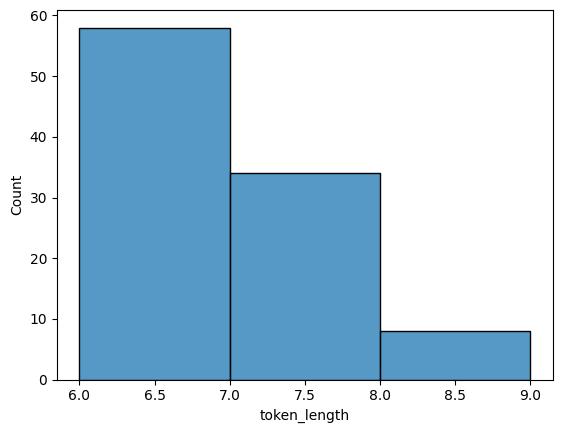

In [7]:
import seaborn as sns

sns.histplot(highscoreDf.token_length, binwidth=1)

## Read bed files containing overlapping tokens and attribution scores

In [8]:
import os
import pandas as pd
from pathlib import Path


overlappingFilesDir = Path(os.environ['GENOMICS_DATA_BASE'], 'genome_nlp_tokens', 'overlapping_with_annotations', 'SAUR')

overlappingDfList = []
for overlappingFile in os.listdir(overlappingFilesDir):
    df = pd.read_csv(Path(overlappingFilesDir, overlappingFile), sep='\t', names=['contig_id', 'start_position', 'end_position', 'tokens', 'score', 'feature_type', 'id', 'name', 'gene', 'atributes'])
    df = df[df.feature_type.isin(['CDS', 'ncRNA', 'oriC', 'regulatory_region', 'oriT'])]
    df['tube_code'] = [overlappingFile.split('_')[0]]*df.shape[0]
    df = df[df.tokens.apply(lambda x: (len(x) >= 5))].reset_index()
    df['gene'] = df.gene.str.lower()
    overlappingDfList.append(df)
overlappingDf = pd.concat(overlappingDfList, ignore_index=True)
overlappingDf = overlappingDf.drop_duplicates()
overlappingDf

/tmp/ipykernel_7977/2042947762.py:10: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(Path(overlappingFilesDir, overlappingFile), sep='\t', names=['contig_id', 'start_position', 'end_position', 'tokens', 'score', 'feature_type', 'id', 'name', 'gene', 'atributes'])
/tmp/ipykernel_7977/2042947762.py:10: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(Path(overlappingFilesDir, overlappingFile), sep='\t', names=['contig_id', 'start_position', 'end_position', 'tokens', 'score', 'feature_type', 'id', 'name', 'gene', 'atributes'])
/tmp/ipykernel_7977/2042947762.py:10: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(Path(overlappingFilesDir, overlappingFile), sep='\t', names=['contig_id', 'start_position', 'end_position', 'tokens', 'score', 'feature_type', 'id', 'name', 'gene', 'atrib

,index,contig_id,start_position,end_position,tokens,score,feature_type,id,name,gene,atributes,tube_code
0,3,1,138,145,AAAGTAAA,0.009005,CDS,OILJNO_00005,acyl carrier protein,acpp,"ID=OILJNO_00005;Name=acyl carrier protein;locus_tag=OILJNO_00005;product=acyl carrier protein;Dbxref=GO:0000036,GO:0005737,GO:0046677,RefSeq:WP_000426914.1,SO:0001217,UniParc:UPI0000125385,UniRef:UniRef100_A7X1J8,UniRef:UniRef50_A7X1J8,UniRef:UniRef90_A7X1J8;gene=acpP",AH20I016
1,4,1,146,151,AGATAT,-0.010377,CDS,OILJNO_00005,acyl carrier protein,acpp,"ID=OILJNO_00005;Name=acyl carrier protein;locus_tag=OILJNO_00005;product=acyl carrier protein;Dbxref=GO:0000036,GO:0005737,GO:0046677,RefSeq:WP_000426914.1,SO:0001217,UniParc:UPI0000125385,UniRef:UniRef100_A7X1J8,UniRef:UniRef50_A7X1J8,UniRef:UniRef90_A7X1J8;gene=acpP",AH20I016
2,6,1,156,160,GTTGA,-0.016608,CDS,OILJNO_00005,acyl carrier protein,acpp,"ID=OILJNO_00005;Name=acyl carrier protein;locus_tag=OILJNO_00005;product=acyl carrier protein;Dbxref=GO:0000036,GO:0005737,GO:0046677,RefSeq:WP_000426914.1,SO:0001217,UniParc:UPI0000125385,UniRef:UniRef100_A7X1J8,UniRef:UniRef50_A7X1J8,UniRef:UniRef90_A7X1J8;gene=acpP",AH20I016
3,8,1,164,169,TTTAGG,-0.011910,CDS,OILJNO_00005,acyl carrier protein,acpp,"ID=OILJNO_00005;Name=acyl carrier protein;locus_tag=OILJNO_00005;product=acyl carrier protein;Dbxref=GO:0000036,GO:0005737,GO:0046677,RefSeq:WP_000426914.1,SO:0001217,UniParc:UPI0000125385,UniRef:UniRef100_A7X1J8,UniRef:UniRef50_A7X1J8,UniRef:UniRef90_A7X1J8;gene=acpP",AH20I016
4,9,1,170,175,TGTAGA,0.002626,CDS,OILJNO_00005,acyl carrier protein,acpp,"ID=OILJNO_00005;Name=acyl carrier protein;locus_tag=OILJNO_00005;product=acyl carrier protein;Dbxref=GO:0000036,GO:0005737,GO:0046677,RefSeq:WP_000426914.1,SO:0001217,UniParc:UPI0000125385,UniRef:UniRef100_A7X1J8,UniRef:UniRef50_A7X1J8,UniRef:UniRef90_A7X1J8;gene=acpP",AH20I016
...,...,...,...,...,...,...,...,...,...,...,...,...
110816017,337313,5,205763,205769,ATGATAT,0.002546,CDS,KKIOAG_10525,Prepilin signal peptidase PulO (type II secretory pathway) or related peptidase,pulo,"ID=KKIOAG_10525;Name=Prepilin signal peptidase PulO (type II secretory pathway) or related peptidase;locus_tag=KKIOAG_10525;product=Prepilin signal peptidase PulO (type II secretory pathway) or related peptidase;Dbxref=COG:COG1989,COG:NU,RefSeq:WP_000261111.1,SO:0001217,UniParc:UPI0001DDA595,UniRef:UniRef100_A0A0D1JKS9,UniRef:UniRef50_A0A0D1JKS9,UniRef:UniRef90_A0A0D1JKS9;gene=pulO",AH21K020
110816018,337314,5,205770,205775,CCATCA,0.000022,CDS,KKIOAG_10525,Prepilin signal peptidase PulO (type II secretory pathway) or related peptidase,pulo,"ID=KKIOAG_10525;Name=Prepilin signal peptidase PulO (type II secretory pathway) or related peptidase;locus_tag=KKIOAG_10525;product=Prepilin signal peptidase PulO (type II secretory pathway) or related peptidase;Dbxref=COG:COG1989,COG:NU,RefSeq:WP_000261111.1,SO:0001217,UniParc:UPI0001DDA595,UniRef:UniRef100_A0A0D1JKS9,UniRef:UniRef50_A0A0D1JKS9,UniRef:UniRef90_A0A0D1JKS9;gene=pulO",AH21K020
110816019,337315,5,205776,205781,ATTTTT,-0.002056,CDS,KKIOAG_10525,Prepilin signal peptidase PulO (type II secretory pathway) or related peptidase,pulo,"ID=KKIOAG_10525;Name=Prepilin signal peptidase PulO (type II secretory pathway) or related peptidase;locus_tag=KKIOAG_10525;product=Prepilin signal peptidase PulO (type II secretory pathway) or related peptidase;Dbxref=COG:COG1989,COG:NU,RefSeq:WP_000261111.1,SO:0001217,UniParc:UPI0001DDA595,UniRef:UniRef100_A0A0D1JKS9,UniRef:UniRef50_A0A0D1JKS9,UniRef:UniRef90_A0A0D1JKS9;gene=pulO",AH21K020
110816020,337316,5,205782,205787,AGGAGG,0.000008,CDS,KKIOAG_10525,Prepilin signal peptidase PulO (type II secretory pathway) or related peptidase,pulo,"ID=KKIOAG_10525;Name=Prepilin signal peptidase PulO (type II secretory pathway) or related peptidase;locus_tag=KKIOAG_10525;product=Prepilin signal peptidase PulO (type II secretory pathway) or related peptidase;Dbxref=COG:COG1989,COG:NU,RefSeq:WP_000261111.1,SO:0001217,UniParc:U

## Get overlapping tokens for high-score tokens

In [9]:
tokenOverlapsDfs = []
for signatureToken in highscoreDf.tokens:
    tokenOverlapsDf = overlappingDf[overlappingDf.tokens == signatureToken]
    tokenOverlapsDfs.append(tokenOverlapsDf)
highscoreTokenOverlapsDf = pd.concat(tokenOverlapsDfs, ignore_index=True)
highscoreTokenOverlapsDf

,index,contig_id,start_position,end_position,tokens,score,feature_type,id,name,gene,atributes,tube_code
0,3113,1,19136,19142,TTATATA,0.002561,CDS,OILJNO_00090,FemA/FemB family glycyltransferase FmhC,fmhc,"ID=OILJNO_00090;Name=FemA/FemB family glycyltransferase FmhC;locus_tag=OILJNO_00090;product=FemA/FemB family glycyltransferase FmhC;Dbxref=BlastRules:WP_100495214,COG:COG2348,COG:M,RefSeq:WP_000672867.1,SO:0001217,UniParc:UPI0000054ADD,UniRef:UniRef100_Q9ZNI0,UniRef:UniRef50_B9DMC1,UniRef:UniRef90_Q9ZNI0;gene=fmhC",AH20I016
1,15299,1,99053,99059,TTATATA,0.002437,CDS,OILJNO_00445,Transposase,NaN,"ID=OILJNO_00445;Name=Transposase;locus_tag=OILJNO_00445;product=Transposase;Dbxref=RefSeq:WP_001641468.1,SO:0001217,UniParc:UPI00003B1AD2,UniRef:UniRef100_A0A659IBS1,UniRef:UniRef50_A0A0H2VFZ5,UniRef:UniRef90_A0A659IBS1",AH20I016
2,18777,1,122412,122418,TTATATA,-0.002410,CDS,OILJNO_00575,Spore germination protein YkwD and related proteins with CAP (CSP/antigen 5/PR1) domain,ykwd,"ID=OILJNO_00575;Name=Spore germination protein YkwD and related proteins with CAP (CSP/antigen 5/PR1) domain;locus_tag=OILJNO_00575;product=Spore germination protein YkwD and related proteins with CAP (CSP/antigen 5/PR1) domain;Dbxref=COG:COG2340,COG:DR,RefSeq:WP_000380734.1,SO:0001217,UniParc:UPI0001AE867D,UniRef:UniRef100_A0A6B5KVX9,UniRef:UniRef50_Q49XD3,UniRef:UniRef90_A0A7U7EVA2;gene=ykwD",AH20I016
3,22649,1,147651,147657,TTATATA,0.000810,CDS,OILJNO_00680,Protein GlcT,glct,"ID=OILJNO_00680;Name=Protein GlcT;locus_tag=OILJNO_00680;product=Protein GlcT;Dbxref=COG:COG3711,COG:K,GO:0003723,GO:0045893,RefSeq:WP_000505015.1,SO:0001217,UniParc:UPI00000D7867,UniRef:UniRef100_A7X215,UniRef:UniRef50_O33618,UniRef:UniRef90_Q6GH48;gene=glcT",AH20I016
4,24913,1,162314,162320,TTATATA,0.014093,CDS,OILJNO_00740,indole-3-glycerol phosphate synthase TrpC,trpc,"ID=OILJNO_00740;Name=indole-3-glycerol phosphate synthase TrpC;locus_tag=OILJNO_00740;product=indole-3-glycerol phosphate synthase TrpC;Dbxref=COG:COG0134,COG:E,EC:4.1.1.48,GO:0000162,GO:0004425,RefSeq:WP_000153617.1,SO:0001217,UniParc:UPI00024C3523,UniRef:UniRef100_A0A7Z8DDL4,UniRef:UniRef50_Q49XH6,UniRef:UniRef90_Q6GH35;gene=trpC",AH20I016
...,...,...,...,...,...,...,...,...,...,...,...,...
4417520,314954,5,63936,63942,ATATTTG,0.000627,CDS,KKIOAG_09955,Beta- N-acetylglucosaminidase,lytd,"ID=KKIOAG_09955;Name=Beta- N-acetylglucosaminidase;locus_tag=KKIOAG_09955;product=Beta- N-acetylglucosaminidase;Dbxref=COG:COG4193,COG:G,RefSeq:WP_001032833.1,SO:0001217,UniParc:UPI00000BF2A9,UniRef:UniRef100_Q8GQH4,UniRef:UniRef50_Q8GQH4,UniRef:UniRef90_Q8GQH4;gene=lytD",AH21K020
4417521,317360,5,79788,79794,ATATTTG,0.000407,CDS,KKIOAG_10035,putative arabinose efflux permease AraJ%2C MFS family,araj,"ID=KKIOAG_10035;Name=putative arabinose efflux permease AraJ%2C MFS family;locus_tag=KKIOAG_10035;product=putative arabinose efflux permease AraJ%2C MFS family;Dbxref=COG:COG2814,COG:G,RefSeq:WP_001025061.1,SO:0001217,UniParc:UPI0000054372,UniRef:UniRef100_A0A068A6D8,UniRef:UniRef50_B9DN48,UniRef:UniRef90_A0A068A6D8;gene=araJ",AH21K020
4417522,320734,5,101468,101474,ATATTTG,0.000718,CDS,KKIOAG_10115,Putative aminopeptidase FrvX,frvx,"ID=KKIOAG_10115;Name=Putative aminopeptidase FrvX;locus_tag=KKIOAG_10115;product=Putative aminopeptidase FrvX;Dbxref=COG:COG1363,COG:EG,RefSeq:WP_001024574.1,SO:0001217,UniParc:UPI00003B177A,UniRef:UniRef100_A0A0E0VPT0,UniRef:UniRef50_W8TVI2,UniRef:UniRef90_W8TVI2;gene=frvX",AH21K020
4417523,321578,5,106376,106382,ATATTTG,0.001116,CDS,KKIOAG_10135,DNA segregation ATPase FtsK/SpoIIIE or related protein,ftsk,"ID=KKIOAG_10135;Name=DNA segregation ATPase FtsK/SpoIIIE or related protein;locus_tag=KKIOAG_10135;product=DNA segregation ATPase FtsK/SpoIIIE or related protein;Dbxref=COG:COG1674,COG:D,RefSeq:WP_098817897.1,SO:0001217,UniParc:UPI000AC1E846,UniRef:UniRef100_UPI000AC1E846,UniRef:UniRef50_Q4L785,UniRef:UniRef90_A0A133PVD0;gene=ftsK",AH21K020


## Calculate weighted sum for all genes

In [10]:
import numpy as np


geneWeightedsumDf = highscoreTokenOverlapsDf.groupby(by=['gene']).agg({'score': np.sum}).reset_index().rename(columns={'score': 'weighted_sum'})
geneWeightedsumDf

/tmp/ipykernel_7977/2423154480.py:4: FutureWarning: The provided callable <function sum at 0x7fac775683a0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  geneWeightedsumDf = highscoreTokenOverlapsDf.groupby(by=['gene']).agg({'score': np.sum}).reset_index().rename(columns={'score': 'weighted_sum'})


,gene,weighted_sum
0,5_ureb_srna,-0.470175
1,6s,1.866455
2,aaa,2.416610
3,abc-f,0.954951
4,abcc,0.098061
...,...,...
1948,zapa,0.493994
1949,znua,3.566931
1950,znub,0.504884
1951,znuc,1.048745


## Visualise weighted sum

<Axes: xlabel='weighted_sum', ylabel='Count'>

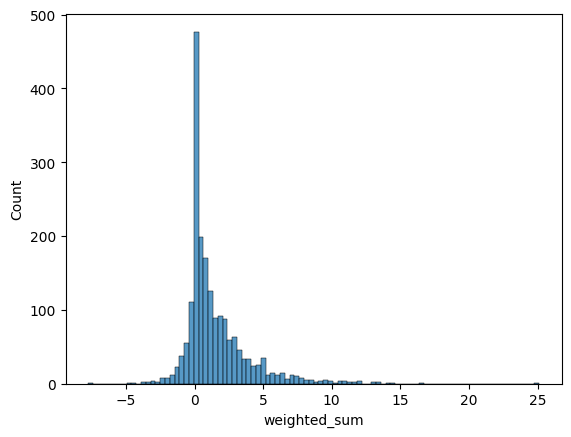

In [11]:
import seaborn as sns


sns.histplot(geneWeightedsumDf.weighted_sum)

## Top genes based on the weighted sum

In [12]:
geneWeightedsumDf.sort_values(by=['weighted_sum'], ascending=False)[:20]

,gene,weighted_sum
393,era,25.114755
346,dnag,16.619624
1107,pote,14.551982
1044,pepf,14.051999
766,lys2b,13.452630
1500,smc,13.285406
494,ftsk,13.136957
5,abgb,13.025699
1222,rela,12.092255
1568,tagh,11.924981


## Create gene-type lookup table from amrfinderplus annotations

In [13]:
import os

import pandas as pd

from pathlib import Path


amrfinderDir = Path(os.environ['GENOMICS_DATA_BASE'], 'amrfinder')

amrfinderDfList = []
for amrfinderFile in os.listdir(amrfinderDir):
    amrfinderDf = pd.read_csv(Path(amrfinderDir, amrfinderFile), sep='\t')
    amrfinderDfList.append(amrfinderDf)

allAmrfinderDf = pd.concat(amrfinderDfList, ignore_index=True)
allAmrfinderDf

/tmp/ipykernel_7977/536070399.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  allAmrfinderDf = pd.concat(amrfinderDfList, ignore_index=True)


,Protein identifier,Contig id,Start,Stop,Strand,Gene symbol,Sequence name,Scope,Element type,Element subtype,Class,Subclass,Method,Target length,Reference sequence length,% Coverage of reference sequence,% Identity to reference sequence,Alignment length,Accession of closest sequence,Name of closest sequence,HMM id,HMM description
0,NaN,1,83926,85452,-,aur,zinc metalloproteinase aureolysin,plus,VIRULENCE,VIRULENCE,NaN,NaN,BLASTX,509,509,100.00,99.41,509,EHO93748.1,zinc metalloproteinase aureolysin,NaN,NaN
1,NaN,1,128415,129464,+,icaC,polysaccharide intercellular adhesin biosynthesis/export protein IcaC,plus,VIRULENCE,VIRULENCE,NaN,NaN,EXACTX,350,350,100.00,100.00,350,AUU58561.1,polysaccharide intercellular adhesin biosynthesis/export protein IcaC,NaN,NaN
2,NaN,1,150950,154498,-,cna,collagen adhesin Cna,plus,VIRULENCE,VIRULENCE,NaN,NaN,BLASTX,1183,1183,100.00,98.31,1183,BAB96477.1,collagen adhesin Cna,NaN,NaN
3,NaN,1,277464,278813,+,tet(38),tetracycline efflux MFS transporter Tet(38),core,AMR,AMR,TETRACYCLINE,TETRACYCLINE,EXACTX,450,450,100.00,100.00,450,WP_001100300.1,tetracycline efflux MFS transporter Tet(38),NaN,NaN
4,NaN,1,505300,506652,+,mepA,multidrug efflux MATE transporter MepA,plus,AMR,AMR,EFFLUX,EFFLUX,BLASTX,451,451,100.00,99.33,451,BAB41547.1,multidrug efflux MATE transporter MepA,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57610,NaN,17,83399,84580,-,emrD,multidrug efflux MFS transporter EmrD,plus,AMR,AMR,EFFLUX,EFFLUX,BLASTX,394,394,100.00,99.24,394,ACN65732.1,multidrug efflux MFS transporter EmrD,NaN,NaN
57611,NaN,2,213498,214724,-,kdeA,multidrug efflux MFS transporter KdeA,plus,AMR,AMR,EFFLUX,EFFLUX,BLASTX,409,410,99.76,99.02,409,ABR76310.1,multidrug efflux MFS transporter KdeA,NaN,NaN
57612,NaN,3,59710,60882,+,oqxA,multidrug efflux RND transporter periplasmic adaptor subunit OqxA,core,AMR,AMR,PHENICOL/QUINOLONE,PHENICOL/QUINOLONE,BLASTX,391,391,100.00,99.23,391,WP_002914189.1,multidrug efflux RND transporter periplasmic adaptor subunit OqxA,NaN,NaN
57613,NaN,3,60909,64058,+,oqxB9,multidrug efflux RND transporter permease subunit OqxB9,core,AMR,AMR,PHENICOL/QUINOLONE,PHENICOL/QUINOLONE,ALLELEX,1050,1050,100.00,100.00,1050,WP_012967412.1,multidrug efflux RND transporter permease subunit OqxB9,NaN,NaN


In [14]:
genetypeLookupDf = allAmrfinderDf[['Gene symbol', 'Element type']].drop_duplicates()
genetypeLookupDf['Gene symbol'] = genetypeLookupDf['Gene symbol'].str.lower()
genetypeLookupDf

,Gene symbol,Element type
0,aur,VIRULENCE
1,icac,VIRULENCE
2,cna,VIRULENCE
3,tet(38),AMR
4,mepa,AMR
...,...,...
55837,blapdc-58,AMR
56358,blaact-49,AMR
56951,blandm-4,AMR
56963,aac(6')-ib-cr,AMR


## Read vfdb info file

In [17]:
import os
import pandas as pd
from pathlib import Path


vfdbInfoFile = Path(os.environ['GENOMICS_DATA_BASE'], 'misc', 'VFDB_info.csv')
vfdbInfoDf = pd.read_csv(vfdbInfoFile)
vfdbInfoDf['Label'] = vfdbInfoDf['Label'].str.lower()
vfdbInfoDf

,Column,ID,Label,Description,Source,Class
0,1,c0393,vat,hemoglobin protease,Escherichia coli O6:K2:H1 CFT073 (UPEC),Autotransporters
1,2,APECO1_O1CoBM73,tsh,Tsh,Escherichia coli O1:K1:H7 (APEC),Autotransporters
2,3,Q673F0_ECOLX,rpea,putative SPATE autotransporter; similar to the SPATE proteins,Escherichia coli plasmid pRAP strain REPEC 83/39,Autotransporters
3,4,ECSF_4010,ecsf_4010,phage protein,Escherichia coli SE15,Autotransporters
4,5,EcSMS35_3921,ecsms35_3921,outer membrane autotransporter,Escherichia coli SMS-3-5 (environmental),Autotransporters
...,...,...,...,...,...,...
249,250,c5077,yddo,ABC transporter ATP-binding protein,Escherichia coli O6:K2:H1 CFT073 (UPEC),UPEC specific genes
250,251,c5078,c5078,oligopeptide ABC transporter,Escherichia coli O6:K2:H1 CFT073 (UPEC),UPEC specific genes
251,252,c5079,yddq,ABC transporter permease,Escherichia coli O6:K2:H1 CFT073 (UPEC),UPEC specific genes
252,253,c5080,yddr,ABC transporter permease,Escherichia coli O6:K2:H1 CFT073 (UPEC),UPEC specific genes


## Read vf collection

In [18]:
import os
import pandas as pd
from pathlib import Path


vfCollectionDescriptionFile = Path(os.environ['GENOMICS_DATA_BASE'], 'misc', 'ecoli_VF_collection_description.tsv')
vfCollectionDescriptionDf = pd.read_csv(vfCollectionDescriptionFile, sep='\t')
vfCollectionDescriptionDf['gene'] = vfCollectionDescriptionDf['gene'].str.lower()
vfCollectionDescriptionDf

,gene,locus tag,accession number (protein_id),description,reference,source,class
0,aap,EC042_pAA055,NaN,dispersin,Escherichia coli O44:H18 042 plasmid pAA (EAEC),VFDB R2,Adhesion_invasion
1,aata,EC042_pAA008,NaN,dispersin secretion locus ABC transporter,Escherichia coli O44:H18 042 plasmid pAA (EAEC),VFDB R2,Adhesion_invasion
2,aatb,EC042_pAA009,NaN,dispersin secretion locus ABC transporter,Escherichia coli O44:H18 042 plasmid pAA (EAEC),VFDB R2,Adhesion_invasion
3,aatc,EC042_pAA010,NaN,dispersin secretion locus ABC transporter,Escherichia coli O44:H18 042 plasmid pAA (EAEC),VFDB R2,Adhesion_invasion
4,aatd,EC042_pAA011,NaN,dispersin secretion locus ABC transporter,Escherichia coli O44:H18 042 plasmid pAA (EAEC),VFDB R2,Adhesion_invasion
...,...,...,...,...,...,...,...
1064,lngj,NaN,ABU50049,"longus pili, coli surface antigen CS20",Escherichia coli O8:H9 E9034A (ETEC),VFDB R3,Type_4_pilus
1065,lngp,NaN,ABU50050,"longus pili, coli surface antigen CS20",Escherichia coli O8:H9 E9034A (ETEC),VFDB R3,Type_4_pilus
1066,etsa,APECO1_O1CoBM197,YP_001481352,ABC transporter,Escherichia coli O1:K1:H7 APEC O1 plasmid pAPEC-O1-ColBM (APEC),manually,Other_virulence_gene
1067,etsb,APECO1_O1CoBM198,YP_001481353,ABC transporter,Escherichia coli O1:K1:H7 APEC O1 plasmid pAPEC-O1-ColBM (APEC),manually,Other_virulence_gene


## Read ABRicate

In [19]:
import os
import pandas as pd
from pathlib import Path


abricateFile = Path(os.environ['GENOMICS_DATA_BASE'], 'misc', 'ABRicate.csv')
abricateDf = pd.read_csv(abricateFile)
abricateDf['gene'] = abricateDf['gene'].str.lower()
abricateDf

,gene,type
0,aaa23990,heat-stable enterotoxin
1,aaa24093,heat labile enterotoxin type IIa A
2,aaa24094,heat labile enterotoxin type IIa B
3,apeco1_1753,hypothetical protein
4,apeco1_1761,hypothetical protein
...,...,...
2696,ygeh,transcriptional regulator
2697,yggr,
2698,yghg,
2699,yijp,


## Add gene descriptions to the top genes

In [20]:
geneWeightedsumDf.sort_values(by=['weighted_sum'], ascending=False)[:20].merge(
    highscoreTokenOverlapsDf[['gene', 'name']].drop_duplicates(),
    on=['gene'],
    how='inner'
).merge(
    genetypeLookupDf,
    left_on=['gene'],
    right_on=['Gene symbol'],
    how='left'
).rename(
    columns={'Element type': 'AMR Finder Type'}
).merge(
    vfdbInfoDf,
    left_on=['gene'],
    right_on=['Label'],
    how='left'
).rename(
    columns={'Class': 'VFDB Type'}
).merge(
    vfCollectionDescriptionDf,
    on=['gene'],
    how='left'
).rename(
    columns={'class': 'VF Collection Type'}
)[['gene', 'name', 'weighted_sum', 'AMR Finder Type', 'VFDB Type', 'VF Collection Type']].drop_duplicates()

,gene,name,weighted_sum,AMR Finder Type,VFDB Type,VF Collection Type
0,era,GTPase Era%2C involved in 16S rRNA processing,25.114755,NaN,NaN,NaN
1,era,GTPase Era,25.114755,NaN,NaN,NaN
2,dnag,DNA primase,16.619624,NaN,NaN,NaN
3,pote,Serine transporter YbeC%2C amino acid:H+ symporter family,14.551982,NaN,NaN,NaN
4,pepf,oligoendopeptidase F,14.051999,NaN,NaN,NaN
5,lys2b,Thioester reductase domain of alpha aminoadipate reductase Lys2 and NRPSs,13.452630,NaN,NaN,NaN
6,smc,chromosome segregation protein SMC,13.285406,NaN,NaN,NaN
7,ftsk,Cell division protein FtsK,13.136957,NaN,NaN,NaN
8,ftsk,DNA segregation ATPase FtsK/SpoIIIE or related protein,13.136957,NaN,NaN,NaN
9,ftsk,DNA translocase FtsK,13.136957,NaN,NaN,NaN


## Create annotations data matrix

In [21]:
signatureAnnotationsDf = highscoreTokenOverlapsDf[highscoreTokenOverlapsDf['gene'].isin(geneWeightedsumDf.sort_values(by=['weighted_sum'], ascending=False)[:20]['gene'])]
signatureAnnotationsDf

,index,contig_id,start_position,end_position,tokens,score,feature_type,id,name,gene,atributes,tube_code
8,41807,1,263957,263963,TTATATA,0.002288,CDS,OILJNO_01105,GTPase Era%2C involved in 16S rRNA processing,era,"ID=OILJNO_01105;Name=GTPase Era%2C involved in 16S rRNA processing;locus_tag=OILJNO_01105;product=GTPase Era%2C involved in 16S rRNA processing;Dbxref=COG:COG1159,COG:J,RefSeq:WP_017804738.1,SO:0001217,UniParc:UPI0003713F5E,UniRef:UniRef100_UPI0003713F5E,UniRef:UniRef50_Q49XP7,UniRef:UniRef90_A0A7U7EYP0;gene=era",AH20I016
10,60472,1,381606,381612,TTATATA,0.002565,CDS,OILJNO_01700,DNA primase,dnag,"ID=OILJNO_01700;Name=DNA primase;locus_tag=OILJNO_01700;product=DNA primase;Dbxref=COG:COG0358,COG:L,EC:2.7.7.101,GO:0000428,GO:0003677,GO:0003678,GO:0003896,GO:0005524,GO:0008270,GO:1990077,KEGG:K02316,RefSeq:WP_001217257.1,SO:0001217,UniParc:UPI00000CA9E4,UniRef:UniRef100_P63964,UniRef:UniRef50_O05338,UniRef:UniRef90_O05338;gene=dnaG",AH20I016
11,67828,1,427261,427267,TTATATA,0.001577,CDS,OILJNO_01955,23S rRNA C2501 and tRNA U34 5'-hydroxylation protein RlhA/YrrN/YrrO%2C U32 peptidase family,rlha,"ID=OILJNO_01955;Name=23S rRNA C2501 and tRNA U34 5'-hydroxylation protein RlhA/YrrN/YrrO%2C U32 peptidase family;locus_tag=OILJNO_01955;product=23S rRNA C2501 and tRNA U34 5'-hydroxylation protein RlhA/YrrN/YrrO%2C U32 peptidase family;Dbxref=COG:COG0826,COG:J,RefSeq:WP_000137775.1,SO:0001217,UniParc:UPI00000D9E6B,UniRef:UniRef100_A0A0U1MM88,UniRef:UniRef50_O32035,UniRef:UniRef90_A0A2K4AGQ8;gene=rlhA",AH20I016
24,192575,3,118633,118639,TTATATA,0.002976,CDS,OILJNO_05530,oligoendopeptidase F,pepf,"ID=OILJNO_05530;Name=oligoendopeptidase F;locus_tag=OILJNO_05530;product=oligoendopeptidase F;Dbxref=COG:COG1164,COG:E,RefSeq:WP_000082725.1,SO:0001217,UniParc:UPI00000D77D8,UniRef:UniRef100_A0A0D1I4D2,UniRef:UniRef50_O31605,UniRef:UniRef90_A0A0D6GH02;gene=pepF",AH20I016
32,259179,4,196322,196328,TTATATA,0.008323,CDS,OILJNO_07780,ABC-type multidrug transport system%2C ATPase and permease component,mdlb,"ID=OILJNO_07780;Name=ABC-type multidrug transport system%2C ATPase and permease component;locus_tag=OILJNO_07780;product=ABC-type multidrug transport system%2C ATPase and permease component;Dbxref=COG:COG1132,COG:V,RefSeq:WP_000817954.1,SO:0001217,UniParc:UPI00000547C5,UniRef:UniRef100_W8U602,UniRef:UniRef50_W8U602,UniRef:UniRef90_W8U602;gene=mdlB",AH20I016
...,...,...,...,...,...,...,...,...,...,...,...,...
4417501,274899,4,65885,65891,ATATTTG,0.000871,CDS,KKIOAG_08470,nitrate reductase subunit alpha,narz,"ID=KKIOAG_08470;Name=nitrate reductase subunit alpha;locus_tag=KKIOAG_08470;product=nitrate reductase subunit alpha;Dbxref=COG:COG5013,COG:CP,RefSeq:WP_072491249.1,SO:0001217,UniParc:UPI0009183631,UniRef:UniRef100_UPI0009183631,UniRef:UniRef50_P9WJQ2,UniRef:UniRef90_A0A0D6GZM2;gene=narZ",AH21K020
4417502,275335,4,68228,68234,ATATTTG,0.000940,CDS,KKIOAG_08470,nitrate reductase subunit alpha,narz,"ID=KKIOAG_08470;Name=nitrate reductase subunit alpha;locus_tag=KKIOAG_08470;product=nitrate reductase subunit alpha;Dbxref=COG:COG5013,COG:CP,RefSeq:WP_072491249.1,SO:0001217,UniParc:UPI0009183631,UniRef:UniRef100_UPI0009183631,UniRef:UniRef50_P9WJQ2,UniRef:UniRef90_A0A0D6GZM2;gene=narZ",AH21K020
4417505,280542,4,102103,102109,ATATTTG,0.000323,CDS,KKIOAG_08645,ABC-type multidrug transport system%2C ATPase and permease component,mdlb,"ID=KKIOAG_08645;Name=ABC-type multidrug transport system%2C ATPase and permease component;locus_tag=KKIOAG_08645;product=ABC-type multidrug transport system%2C ATPase and permease component;Dbxref=COG:COG1132,COG:V,SO:0001217,UniRef:UniRef50_A0A0D6GZH0,UniRef:UniRef90_A0A0D6GZH0;gene=mdlB",AH21K020
4417521,317360,5,79788,79794,ATATTTG,0.000407,CDS,KKIOAG_10035,putative arabinose efflux permease AraJ%2C MFS family,araj,"ID=KKIOAG_10035;Name=putative arabinose efflux permease AraJ%2C MFS family;locus_tag=KKIOAG_10035;product=putative arabinose efflux permease AraJ%2C MFS family;Dbxref=COG:COG2814,COG:G,RefSeq:WP_00102

In [22]:
signatureDataDf = signatureAnnotationsDf[['tube_code', 'gene']].drop_duplicates()
# Get one hot encoding of columns B
one_hot = pd.get_dummies(signatureDataDf['gene'])
# Drop column B as it is now encoded
signatureDataDf = signatureDataDf.drop('gene',axis = 1)
# Join the encoded df
signatureDataDf = signatureDataDf.join(one_hot)
signatureDataDf = signatureDataDf.loc[:, (signatureDataDf != 0).any(axis=0)]
signatureDataDf = signatureDataDf*1
signatureDataDf

,tube_code,abgb,arac,araj,argj,cap8l,citt,dnag,era,ftsk,hrtb,lys2b,mdlb,narz,pepf,pote,rela,rfab,rlha,smc,tagh
8,AH20I016,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
10,AH20I016,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
11,AH20I016,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
24,AH20I016,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
32,AH20I016,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3030813,ALF22F117,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3031287,AH20A069,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3035824,AH20I013,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3043602,AH20H052,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Read mapping information

In [23]:
import os

import pandas as pd


demoTrainDf = pd.read_csv(os.environ['EHR_DATA_BASE'] + '/blood_pos_cohort_20240614/data/wb_365_wa_1/splits_v1/demographics/mortality_normal_train.csv', sep='\t')
demoTestDf = pd.read_csv(os.environ['EHR_DATA_BASE'] + '/blood_pos_cohort_20240614/data/wb_365_wa_1/splits_v1/demographics/mortality_normal_test.csv', sep='\t')
demoValidateDf = pd.read_csv(os.environ['EHR_DATA_BASE'] + '/blood_pos_cohort_20240614/data/wb_365_wa_1/splits_v1/demographics/mortality_normal_validate.csv', sep='\t')
demoDf = pd.concat([demoTrainDf, demoTestDf, demoValidateDf], ignore_index=True)
demoDf

,person_id,visit_occurrence_id,TYPE,COUNTRY_OF_BIRTH,SEX,Age_Bin,JOURNEY_ID
0,678487,3312694,Emergency,Australia,Male,"(60, 70]",3312694
1,2094045,9199249,Emergency,Australia,Male,"(20, 30]",9199249
2,2107813,9410987,Emergency,Australia,Male,"(50, 60]",9410987
3,2083212,602890,Inpatient,Australia,Female,"(40, 50]",9039437
4,2083212,9039437,Emergency,Australia,Female,"(40, 50]",9039437
...,...,...,...,...,...,...,...
7194,2603535,16588204,Inpatient,Australia,Male,"(60, 70]",16588204
7195,2603535,16709341,Inpatient,Australia,Male,"(60, 70]",16709341
7196,2603535,16651755,Inpatient,Australia,Male,"(60, 70]",16651755
7197,2098616,16872774,Emergency,Australia,Female,"(80, 90]",16872774


In [24]:
import os

mappingDf = pd.read_csv(os.environ['GENOMICS_DATA_BASE'] + '/patient_tube_id_mapping_full.tsv', sep='\t')
mappingDf

,tube_code,PATIENT_ID,db_ID,pt_age,pt_gender,EPISODE_ID,hospital_admission,hospital_discharge,hospital_in_last_year,genome_species,species_reported,contig_number,length,tube_code_duplicate_or_old,date_of_collection,ID_number,location_additional_02,collected_from_original
0,AH19J072,213972.0,3JNQS,64,Male,12931474.0,2019-10-17,2019-11-29,yes,Escherichia coli,Escherichia coli,92,5131021,NaN,2019-10-30,19-303-0997,A-7EA;HAEM,Blood
1,AH19J074,213972.0,3JNQS,64,Male,12931474.0,2019-10-17,2019-11-29,yes,Streptococcus sp. D19,Streptococcus mitis group,84,2022991,NaN,2019-10-30,19-303-1174,A-7EA;HAEM,Blood Peripheral
2,AH19B003,526238.0,567AE,85,Male,640261.0,2019-02-04,2019-02-07,no,Escherichia coli,Escherichia coli,93,4942915,NaN,2019-02-03,19-034-1596,A-4WB;GMC,Blood
3,AH20A024,788941.0,3YBDS,58,Female,13194824.0,2020-01-16,2020-01-19,no,Escherichia coli,Escherichia coli,110,5149157,NaN,2020-01-16,20-016-2112,S-ED;Emergency,Blood Venous
4,AH20L041,1023735.0,2VJ78,42,Male,14210147.0,2020-12-18,2021-01-05,yes,Staphylococcus aureus,Staphylococcus aureus,46,2735216,NaN,2020-12-16,20-351-2856,Emergency Dept;nan,Blood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3112,ALF22L076,639020.0,3S6HL,84,Male,17219899.0,2022-12-15,2022-12-20,yes,Streptococcus vestibularis,Streptococcus salivarius group,107,1938627,NaN,2022-12-15,22-349-2150,Ward 4WB,Blood Peripheral
3113,ALF22L089,655404.0,6EWBM,67,Female,NaN,NaN,NaN,NaN,Proteus columbae,Proteus vulgaris,152,3972219,NaN,2022-12-17,22-351-1465,Comm/Amb Clinic,Blood
3114,ALF22L138,2572048.0,YM5PJ,61,Male,NaN,NaN,NaN,NaN,Enterobacter roggenkampii,Enterobacter cloacae complex,66,4876179,NaN,2022-12-27,22-361-0202,Ward 7 East,Hick White Lum
3115,ALF23A102,2054964.0,5DYAH,35,Female,17294287.0,2023-01-12,2023-02-01,yes,Streptococcus constellatus,Streptococcus anginosus group,54,1869828,NaN,2023-01-11,23-011-3305,ICU,Blood Venous


In [25]:
mappedJourneyTubeIdsDf = mappingDf[['tube_code', 'PATIENT_ID', 'EPISODE_ID']].drop_duplicates().merge(
    demoDf[['person_id', 'visit_occurrence_id', 'JOURNEY_ID']],
    how='inner',
    left_on=['PATIENT_ID', 'EPISODE_ID'],
    right_on=['person_id', 'visit_occurrence_id']
).drop(
    columns=['PATIENT_ID', 'EPISODE_ID', 'visit_occurrence_id']
)[['person_id', 'JOURNEY_ID', 'tube_code']].drop_duplicates()
mappedJourneyTubeIdsDf

,person_id,JOURNEY_ID,tube_code
0,50056,13224842,AH20B011
1,62567,12645629,AH19G065
2,138108,14737781,AH21E052
3,211314,13955099,AH20J009
4,211314,13955099,KPN2214
...,...,...,...
512,2084373,16158768,ALF22C004
513,1058066,16759482,ALF22H089
514,2552781,16966609,ALF22J054
515,2638484,16969999,ALF22K143


## Read mortality labels

In [26]:
import os

import pandas as pd

from pathlib import Path


mortalityTrainDf = pd.read_csv(Path(os.environ['EHR_DATA_BASE'], 'blood_pos_cohort_20240614', 'data', 'wb_365_wa_1', 'splits_v1', 'labels', 'mortality', 'mortality_30_day_normal_train.csv'), sep='\t')
mortalityTestDf = pd.read_csv(Path(os.environ['EHR_DATA_BASE'], 'blood_pos_cohort_20240614', 'data', 'wb_365_wa_1', 'splits_v1', 'labels', 'mortality', 'mortality_30_day_normal_test.csv'), sep='\t')
mortalityValidateDf = pd.read_csv(Path(os.environ['EHR_DATA_BASE'], 'blood_pos_cohort_20240614', 'data', 'wb_365_wa_1', 'splits_v1', 'labels', 'mortality', 'mortality_30_day_normal_validate.csv'), sep='\t')
mortalityDf = pd.concat([mortalityTrainDf, mortalityTestDf, mortalityValidateDf], ignore_index=True).drop_duplicates()
mortalityDf

,person_id,JOURNEY_ID,visit_occurrence_id,death_30_day
0,678487,3312694,3312694,0
1,2094045,9199249,9199249,0
2,2107813,9410987,9410987,1
5,2083212,9039437,602890,0
6,2083212,9039437,9039437,0
...,...,...,...,...
30815,2603535,16588204,16588204,0
30820,2603535,16709341,16709341,0
30832,2603535,16651755,16651755,0
30838,2098616,16872774,16872774,0


## Create datamatrix

In [27]:
dataDf = mortalityDf.merge(
    mappedJourneyTubeIdsDf,
    on=['person_id', 'JOURNEY_ID'],
    how='inner'
).drop(
    columns=['visit_occurrence_id']
).drop_duplicates().merge(
    signatureDataDf,
    on=['tube_code'],
    how='inner'
).drop(
    columns=['tube_code']
)
dataDf = dataDf.loc[:, (dataDf != 0).any(axis=0)]
dataDf

,person_id,JOURNEY_ID,death_30_day,abgb,arac,araj,argj,cap8l,citt,dnag,era,ftsk,hrtb,lys2b,mdlb,narz,pepf,pote,rela,rfab,rlha,smc,tagh
0,2154700,10220218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2154700,10220218,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,2154700,10220218,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2154700,10220218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,2154700,10220218,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1233,2515966,16640224,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1234,2515966,16640224,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1235,2515966,16640224,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1236,2515966,16640224,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


## Calculate correlation

In [28]:
dataDf.drop(columns=['person_id', 'JOURNEY_ID']).corr()

,death_30_day,abgb,arac,araj,argj,cap8l,citt,dnag,era,ftsk,hrtb,lys2b,mdlb,narz,pepf,pote,rela,rfab,rlha,smc,tagh
death_30_day,1.000000,0.001377,0.003401,-0.002861,0.005406,0.000855,0.003184,-0.007220,-0.002861,-0.005575,-0.008119,-0.001073,0.003294,0.010099,-0.011174,0.001377,-0.011711,0.003401,-0.005201,-0.004579,0.031083
abgb,0.001377,1.000000,-0.058570,-0.058113,-0.056256,-0.053374,-0.054830,-0.057191,-0.058113,-0.054830,-0.053374,-0.055784,-0.056725,-0.049320,-0.058113,-0.059025,-0.056256,-0.058570,-0.056725,-0.048263,-0.050872
arac,0.003401,-0.058570,1.000000,-0.057666,-0.055823,-0.052963,-0.054408,-0.056750,-0.057666,-0.054408,-0.052963,-0.055355,-0.056288,-0.048941,-0.057666,-0.058570,-0.055823,-0.058120,-0.056288,-0.047891,-0.050480
araj,-0.002861,-0.058113,-0.057666,1.000000,-0.055387,-0.052550,-0.053984,-0.056308,-0.057216,-0.053984,-0.052550,-0.054923,-0.055849,-0.048559,-0.057216,-0.058113,-0.055387,-0.057666,-0.055849,-0.047517,-0.050086
argj,0.005406,-0.056256,-0.055823,-0.055387,1.000000,-0.050870,-0.052258,-0.054508,-0.055387,-0.052258,-0.050870,-0.053167,-0.054064,-0.047007,-0.055387,-0.056256,-0.053617,-0.055823,-0.054064,-0.045999,-0.048485
cap8l,0.000855,-0.053374,-0.052963,-0.052550,-0.050870,1.000000,-0.049581,-0.051715,-0.052550,-0.049581,-0.048264,-0.050443,-0.051294,-0.044598,-0.052550,-0.053374,-0.050870,-0.052963,-0.051294,-0.043642,-0.046001
citt,0.003184,-0.054830,-0.054408,-0.053984,-0.052258,-0.049581,1.000000,-0.053126,-0.053984,-0.050934,-0.049581,-0.051820,-0.052694,-0.045815,-0.053984,-0.054830,-0.052258,-0.054408,-0.052694,-0.044833,-0.047257
dnag,-0.007220,-0.057191,-0.056750,-0.056308,-0.054508,-0.051715,-0.053126,1.000000,-0.056308,-0.053126,-0.051715,-0.054051,-0.054962,-0.047788,-0.056308,-0.057191,-0.054508,-0.056750,-0.054962,-0.046763,-0.049291
era,-0.002861,-0.058113,-0.057666,-0.057216,-0.055387,-0.052550,-0.053984,-0.056308,1.000000,-0.053984,-0.052550,-0.054923,-0.055849,-0.048559,-0.057216,-0.058113,-0.055387,-0.057666,-0.055849,-0.047517,-0.050086
ftsk,-0.005575,-0.054830,-0.054408,-0.053984,-0.052258,-0.049581,-0.050934,-0.053126,-0.053984,1.000000,-0.049581,-0.051820,-0.052694,-0.045815,-0.053984,-0.054830,-0.052258,-0.054408,-0.052694,-0.044833,-0.047257


## Plot correlations as a heatmap

<Axes: >

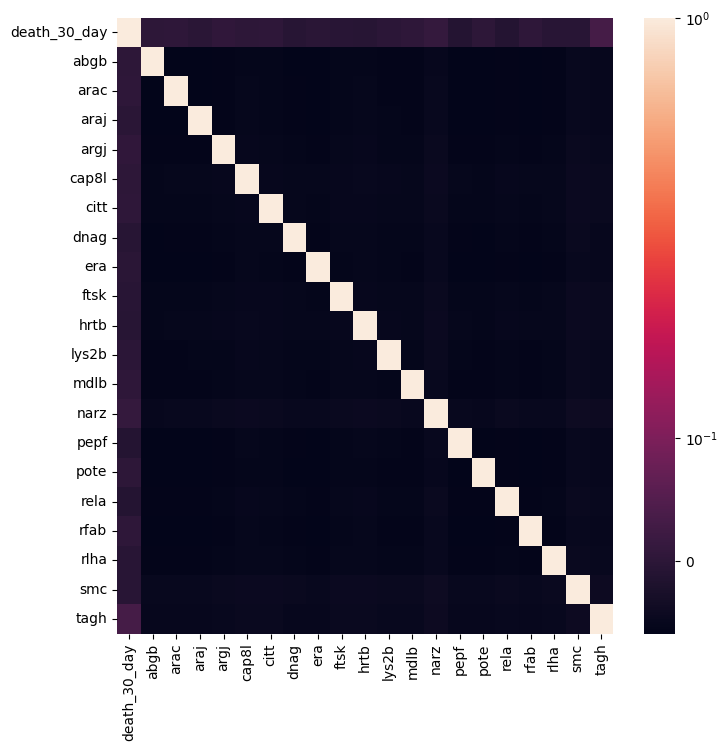

In [29]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from matplotlib.colors import SymLogNorm


f, ax = plt.subplots(1, 1, figsize=(8, 8))

# plot the heatmap
sns.heatmap(dataDf.drop(columns=['person_id', 'JOURNEY_ID']).corr(), norm=SymLogNorm(linthresh=0.3))

## Model using machine learning

In [30]:
X = dataDf[['abgb', 'arac', 'araj', 'argj', 'cap8l', 'citt', 'dnag', 'era', 'ftsk', 'hrtb', 'lys2b', 'mdlb', 'narz', 'pepf', 'pote', 'rela', 'rfab', 'rlha', 'smc', 'tagh']]
y = dataDf.death_30_day

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

accuracy_score(y_test, y_pred)

0.6451612903225806

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
lrc = LogisticRegression(random_state=0)
lrc.fit(X_train, y_train).predict(X_test)

accuracy_score(y_test, y_pred)

0.6451612903225806

In [33]:
coefficients = lrc.coef_[0]
featureImportanceDf = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
    })
featureImportanceDf

,Feature,Coefficient
0,abgb,0.028125
1,arac,0.008269
2,araj,0.068190
3,argj,0.156472
4,cap8l,-0.078837
5,citt,0.133895
6,dnag,-0.102938
7,era,-0.035465
8,ftsk,-0.041208
9,hrtb,-0.069959


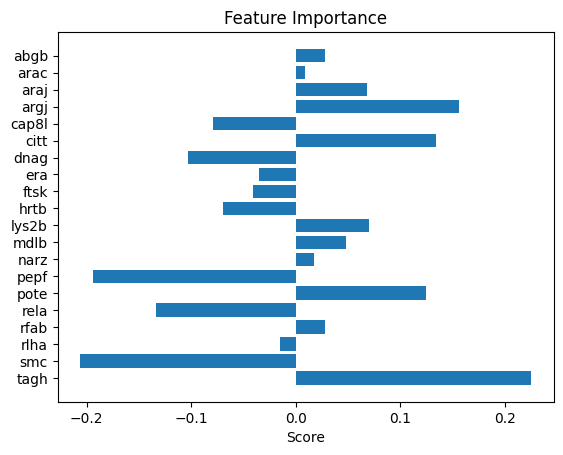

In [34]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots()

ax.barh(y=featureImportanceDf.Feature, width=featureImportanceDf.Coefficient, align='center')
# ax.set_yticks(y_pos, labels=people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Score')
ax.set_title('Feature Importance')

plt.show()